### Clustering Project Using K-means , hierarchichal , DBSCAN on Customer Dataset

In [174]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('libraries are imported')

libraries are imported


In [7]:
!pip install openpyxl
# library is required to read excel file in pandas

In [10]:
df = pd.read_csv("Data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#renaming the columns
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome',
       'SpendingPer']

In [16]:
df.isnull().sum()
# there is no missing value

CustomerID      0
Gender          0
Age             0
AnnualIncome    0
SpendingPer     0
dtype: int64

In [17]:
df.duplicated().sum()
#and also no duplicates in my dataset

0

In [21]:
numerical_data = df.select_dtypes(exclude='O')
numerical_data.head()
#extracting numerical features from the data

,CustomerID,Age,AnnualIncome,SpendingPer
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


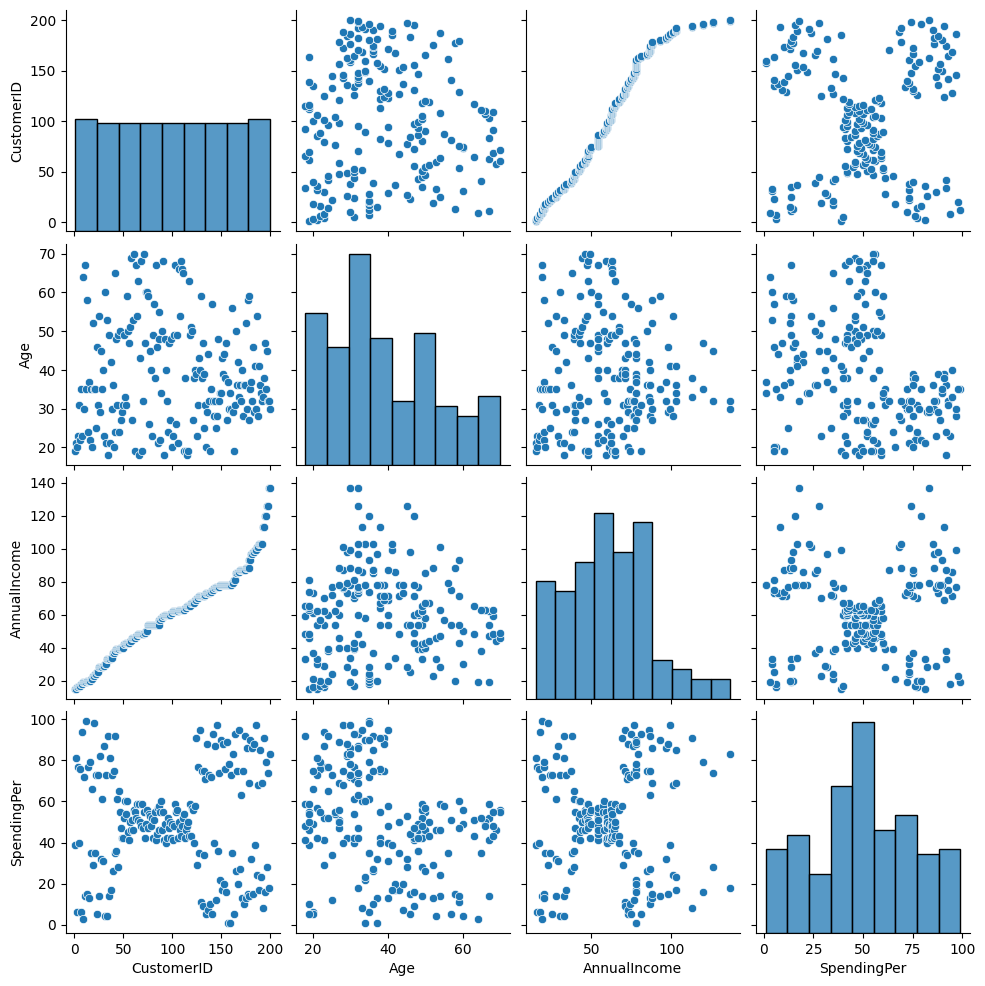

In [22]:
sns.pairplot(numerical_data)

In [25]:
numerical_data.describe()

,CustomerID,Age,AnnualIncome,SpendingPer
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


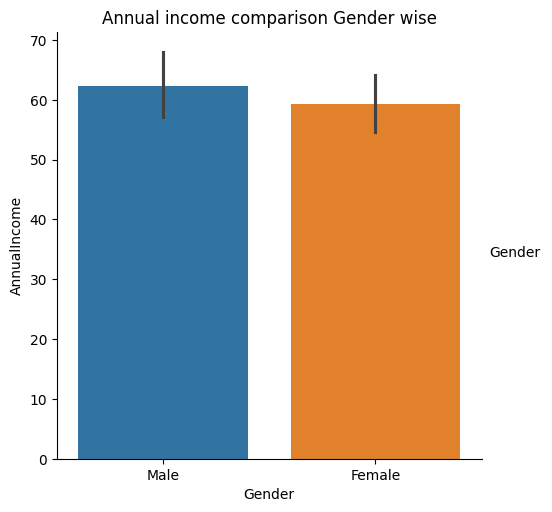

In [133]:
sns.catplot(x='Gender',y='AnnualIncome',data=df,kind='bar',hue="Gender")
plt.title('Annual income comparison Gender wise')
plt.show()

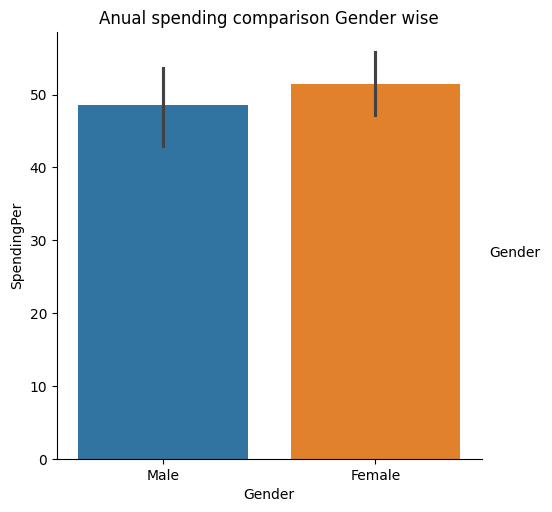

In [38]:
sns.catplot(x='Gender',y='SpendingPer',data=df,kind='bar',hue='Gender')
plt.title('Anual spending comparison Gender wise')
plt.show()

### female has lower income but spending score high 🤣😁😜

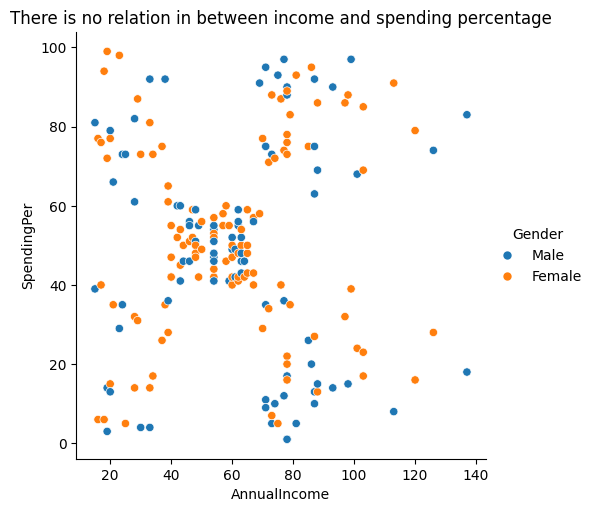

In [42]:
sns.relplot(x='AnnualIncome',y='SpendingPer',data=df,hue='Gender')
plt.title('There is no relation in between income and spending percentage')
plt.show()

## But i was thaught that, if income is high then spending score will also be high 😜😎 

In [46]:
# now i am planing to analyse this data based on age 
# so i , m going filtering the dataset into two parts based on age
# young = 18 to 35
# cenior_citizer = above to 35

young_df = df[df['Age']<=35]
cenior_df =  df[df['Age']>35]

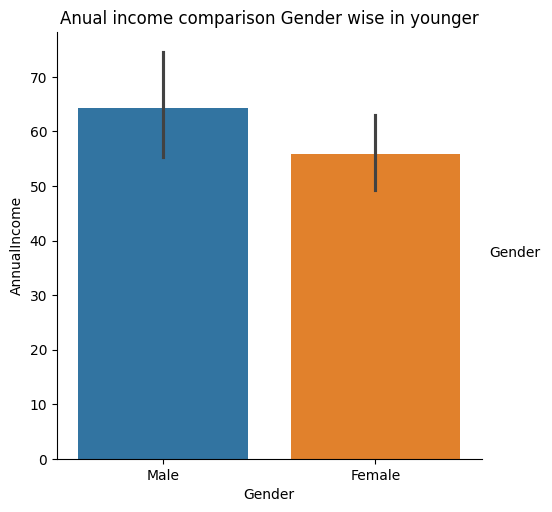

In [47]:
sns.catplot(x='Gender',y='AnnualIncome',data=young_df,kind='bar',hue="Gender")
plt.title('Anual income comparison Gender wise in younger')
plt.show()

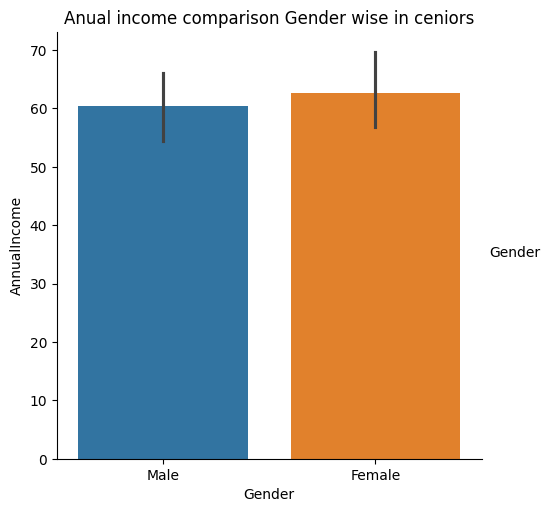

In [48]:
sns.catplot(x='Gender',y='AnnualIncome',data=cenior_df,kind='bar',hue="Gender")
plt.title('Anual income comparison Gender wise in Seniors')
plt.show()

# Ooh Seniors female has highest salary, GOOD

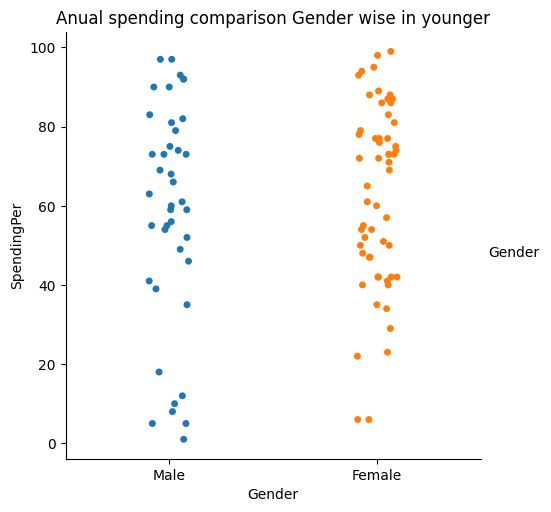

In [51]:
sns.catplot(x='Gender',y='SpendingPer',data=young_df,hue='Gender')
plt.title('Anual spending comparison Gender wise in younger')
plt.show()

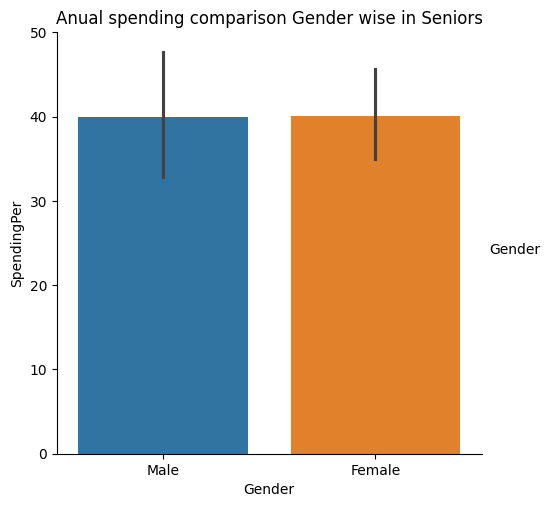

In [52]:
sns.catplot(x='Gender',y='SpendingPer',data=cenior_df,kind='bar',hue='Gender')
plt.title('Anual spending comparison Gender wise in Seniors')
plt.show()

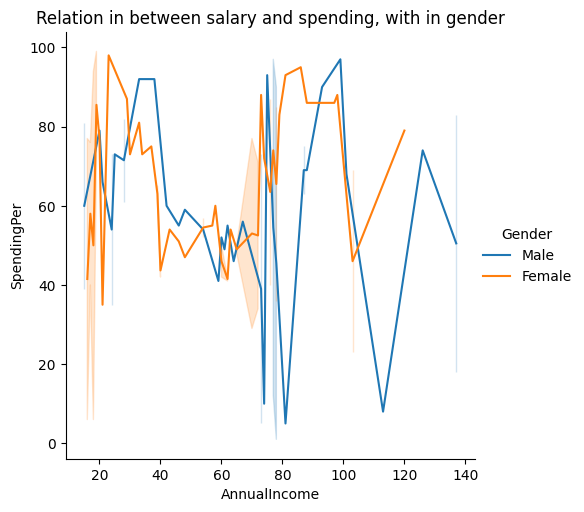

In [56]:
sns.relplot(x='AnnualIncome',y='SpendingPer',data=young_df,kind='line',hue="Gender")
plt.title('Relation in between salary and spending, with in gender')
plt.show()

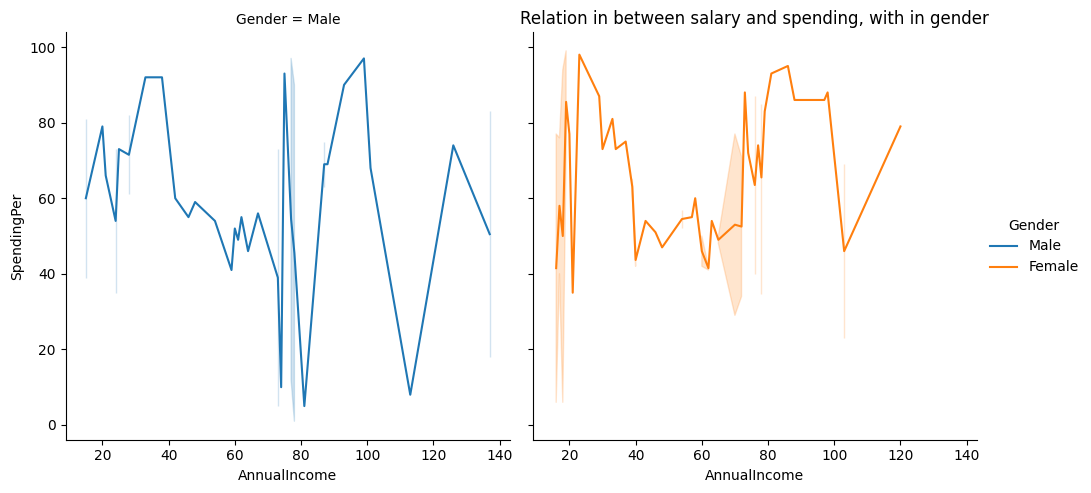

In [57]:
sns.relplot(x='AnnualIncome',y='SpendingPer',data=young_df,kind='line',hue="Gender",col='Gender')
plt.title('Relation in between salary and spending, with in gender')
plt.show()

<h2>Kmeans required scale down dataset, because it is not robust to outliers</h2>
<img src="Data/standrd.png">

In [61]:

stnd_scaler = StandardScaler()
numerical_transformed =  stnd_scaler.fit_transform(numerical_data)

In [81]:
print("Standard Deviation of feature = ",round(pd.DataFrame(numerical_transformed)[1].std()))
print("Mean of the specific feature = ",round(pd.DataFrame(numerical_transformed)[1].mean()))


Standard Deviation of feature =  1
Mean of the specific feature =  0


,CustomerID,Gender,Age,AnnualIncome,SpendingPer
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [88]:
gender = LabelEncoder().fit_transform(np.array(df[['Gender']]).ravel())
# label encoding using LabelEncoder to transform the gender  feature

In [111]:
numerical_data['Gender'] = gender
df_complete = numerical_data
df_complete.head()
#sequence of features are same for final dataframe

,CustomerID,Age,AnnualIncome,SpendingPer,Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [112]:
final_data = np.concatenate([numerical_transformed,np.expand_dims(gender, axis=1)],axis=1)

In [114]:
type(final_data) , final_data.shape
# checking dtype and shape of our final_data

(numpy.ndarray, (200, 5))

In [115]:
kmean = KMeans()
label = kmean.fit_predict(final_data)

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [116]:
label
# all are data item labelized by the cluster tag

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 6, 3, 0, 7,
       0, 7, 2, 7, 7, 7, 2, 7, 7, 6, 2, 2, 2, 6, 7, 6, 6, 7, 6, 2, 6, 7,
       2, 6, 7, 7, 6, 2, 6, 6, 6, 7, 2, 2, 7, 2, 6, 2, 6, 2, 7, 2, 2, 7,
       7, 2, 6, 4, 2, 2, 7, 7, 2, 7, 2, 4, 4, 2, 6, 7, 2, 4, 6, 2, 6, 6,
       6, 4, 2, 4, 4, 4, 6, 2, 2, 2, 4, 2, 2, 1, 4, 1, 2, 1, 5, 1, 5, 1,
       4, 1, 4, 1, 5, 1, 4, 1, 5, 1, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [117]:
print(f"inhertia of WCSS of model with defualt 8 clusters :- {kmean.inertia_}")

179.20825679401372

In [118]:
print(f"silhoute score to confirm the accuracy :- {silhouette_score(final_data,label)}")

0.32700653071371344

## Now we will find best no. of value for " K "

In [130]:
# WCSS      ---->  with  in a cluster sum of squared

def find_wcss(algo,data,max_range):
    wcss = []
    for k in range(2 , max_range):
        algo_inst = algo(n_clusters=k)
        algo_inst.fit_predict(data)
        wcss.append(algo_inst.inertia_)
    return wcss

In [149]:
wcss = find_wcss(KMeans,final_data,40)

In [151]:
len(wcss)

38

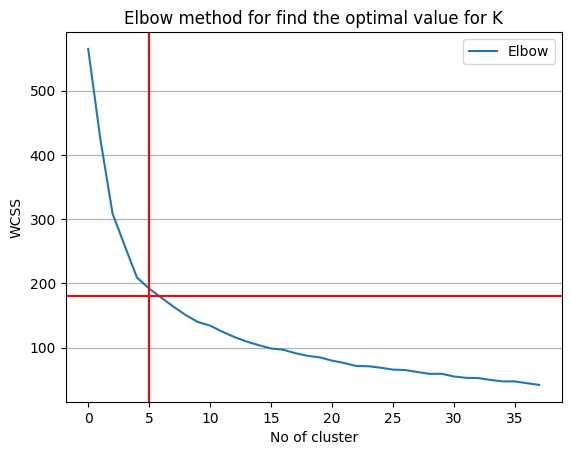

In [173]:
plt.plot(wcss,label='Elbow')
plt.title('Elbow method for find the optimal value for K')
plt.xlabel('No of cluster')
plt.legend()
plt.ylabel('WCSS')
plt.grid(axis='y')
plt.axvline(5,color='r')
plt.axhline(180,color='r')
plt.show()

# according to our ELBOW method we will set NO_CLUSTER OR K = 5

In [170]:
#again we are fitting the kmeans algorithm on our data
label = KMeans(n_clusters=5).fit_predict(final_data)

In [171]:
silhouette_score(final_data,label)

# now we have  increamented 5% accuracy but still we did,nt get a good accuracy

0.37581650891555796

### Accuracy on other algorithm

In [176]:
# heirarchichal clustering algorithm accuracy
silhouette_score(final_data,AgglomerativeClustering().fit_predict(final_data))

0.28856600012427774

In [177]:
# DBSCAN based accuracy
silhouette_score(final_data,DBSCAN().fit_predict(final_data))


-0.16331555529292902

## THANK YOU 🌹✔😉